# Polynomial Regression Example

**Spencer Lyon**

*UCF MSDA Big Data Seminar*


- In this notebook we will look at an example of how feature engineering is necessary for ML success
- We'll start by importing some libraries and importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

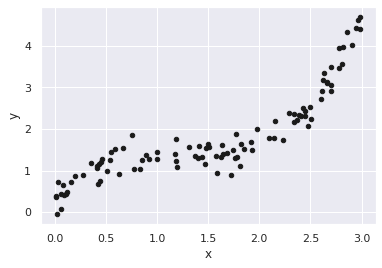

In [2]:
df = pd.read_csv("cubic_data.csv")
df.plot.scatter(x="x", y="y", color="k");

- We will now use the scikit-learn library to fit a linear model
- The model has the form $$y = w_0 + w_1 x$$

In [4]:
from sklearn import linear_model
from sklearn import metrics

In [5]:
mod = linear_model.LinearRegression()
mod.fit(df[["x"]], df["y"])

LinearRegression()

In [6]:
mod.intercept_, mod.coef_

(0.2869534114957022, array([0.99350208]))

- For this dataset, $w_0 = 0.2896$ and $w_1 = 0.9935$
- A common metric for regression tasks is the mean squared error:

In [7]:
linear_prediction = mod.predict(df[["x"]])
metrics.mean_squared_error(df["y"], linear_prediction) # mean((y_i - yhat_i)**2)

0.27253591903962443

Below we will visualize the model and its fit

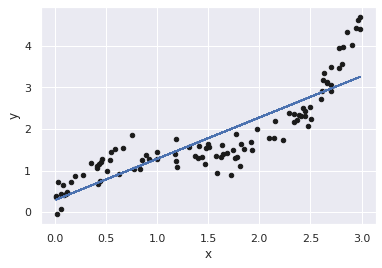

In [8]:
fig, ax = plt.subplots()
df.plot.scatter(x="x", y="y", ax=ax, color="k")
ax.plot(df["x"], linear_prediction);

- After examining the dataset, we see that there may be a cubic pattern (why?)
- Let's use sklearn to fit a cubic model of the form $$y = w_0 + w_1 x + w_2 x^2 + w_3 x^3$$

In [19]:
cubic = linear_model.LinearRegression()
features = df["x"].to_numpy()[:,None] ** np.array([1, 2, 3])[None, :]
cubic.fit(features, df["y"])

LinearRegression()

- Let's take a look a the coefficients and mse

In [20]:
cubic.intercept_, cubic.coef_

(0.2532178764135722, array([ 2.79738384, -2.28920167,  0.61766012]))

In [21]:
cubic_prediction = cubic.predict(features)
metrics.mean_squared_error(df["y"], cubic_prediction)

0.049019853011425224

This is a much better MSE

We can also visually see that the fit is better:

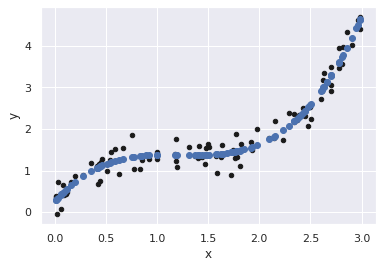

In [12]:
fig, ax = plt.subplots()
df.plot.scatter(x="x", y="y", ax=ax, color="k")
ax.scatter(df["x"], cubic_prediction);

## Outcome

- The cubic model fit this dataset far better than the linear model
- This was a contrived example (the data is a cubic polynomial, plus some noise)
- We knew the underlying relationship was cubic (domain expertiese) and transformed the data appropriately (feature enginnering)


## Neural Networks

- A common benefit of Neural networks is that they will do the feature engineering automatically
- Let's try it out on this simple dataset
- Don't worry about specifics of what the network is doing, we'll get back to that soon

In [22]:
from sklearn import neural_network

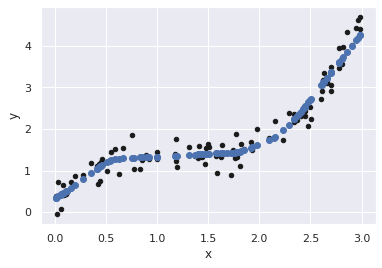

In [24]:
## np.random.seed(42)
nn = neural_network.MLPRegressor(hidden_layer_sizes=(25, 25, 25, 20), max_iter=10000)

# fit with only x
nn.fit(df[["x"]], df["y"])

fig, ax = plt.subplots()
df.plot.scatter(x="x", y="y", ax=ax, color="k")
ax.scatter(df["x"], nn.predict(df[["x"]]));

- With linear models we could look at model weights (coefficients) to understand behavior
- There isn't an obvious/straightforward way to understand what the model is doing 

In [25]:
nn.coefs_

[array([[ 2.30429901e-10, -1.54083318e-01, -3.22425569e-02,
         -4.60486475e-01, -5.72789986e-02, -1.47898408e-01,
         -3.94709866e-02, -8.13947362e-02, -1.15294096e-01,
         -8.58791542e-02, -1.61707157e-02, -1.32865441e-01,
          2.16125725e-01, -4.43535201e-02,  3.05704491e-01,
          1.04037355e-01,  2.37479473e-01,  4.31906187e-01,
         -3.20590785e-01, -1.09713541e-01, -7.25985685e-02,
         -1.00650939e-01,  4.50629965e-02, -1.85506249e-01,
          3.86105262e-01]]),
 array([[-6.67310598e-03,  5.76993695e-02,  3.92491299e-06,
         -2.29233858e-03,  5.20563350e-02,  3.59366331e-02,
         -8.97628303e-02,  4.02868240e-02, -3.92542715e-04,
          3.48884779e-02, -1.06801929e-01, -2.89287019e-02,
          4.25215078e-02, -5.30591828e-02, -5.58417180e-04,
          9.62741743e-02, -1.76432913e-05,  1.08717858e-01,
         -4.61439202e-02,  3.64420678e-02, -5.07273425e-03,
          1.05604493e-07,  1.54959388e-05,  5.21934222e-05,
         -4

- This is known as *interpretability* and is something we will come back to
- For now we'll look a